In [1]:
from pcametric import PCAMetric, AAD
from utils.myeval import supervised_eval, unsupervised_eval
from utils.myfeatureselector import selector_tuned
from utils.datasetloader import dataset_loader
from utils.myplot import values_heatmap, bar_chart, features_line_graph
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
#Calculation of metrics values
datasets = ['zoo', 'iris', 'wine', 'automobile', 'glass', 'dermatology', 'cylinder', 'breast_cancer', 'credit', 'raisin', 'diabetic_retino',
            'phishing', 'yeast', 'car_eval', 'steel', 'CTG', 'rice', 'nursery', 'drybean', 'letter']
methods = ["lasso", "chi_square", "mutual_info", "random_forest"]
clfs = ['dt', 'knn', 'svm']
vardiff_fin = np.zeros([20, 4])
angdiff_fin = np.zeros([20, 4])
f1 = np.zeros([20, 4])
cl = np.zeros([20, 4])
i = 0
for dataset in datasets:
    j = 0
    X, y = dataset_loader(dataset)
    le = LabelEncoder()
    for z in range(len(X.columns)):
        X.iloc[:,z] = le.fit_transform(X.iloc[:,z])
    enc = OrdinalEncoder()
    enc.fit(y)
    my_y = enc.transform(y) 
    my_y = pd.Series(my_y.ravel())
    y = my_y
    for method in methods:
         selfeats = selector_tuned(X, y, method, len(X.columns)//2)
         diffval = 0
         not_selfeats = []
         for q in range(len(X.columns)):
             if q not in selfeats:
                 not_selfeats.append(q)
         myfinval1 = 0
         myfinval2 = 0
         for p in not_selfeats:
            my_X = X.copy()
            my_X.iloc[:, p] = 0
            result, _, _ = PCAMetric(X, my_X)
            myfinval2 += result['exp_var_diff']
         myfinval1 = AAD(X, selfeats)
         myfinval2 /= len(not_selfeats)
         f1score = supervised_eval(X, y, method, len(X.columns)//2, 10, clfs, 5)
         clacc = unsupervised_eval(X.iloc[:, selfeats], y, method, len(X.columns)//2, 10)
         angdiff_fin[i, j] = myfinval1
         vardiff_fin[i, j] = myfinval2
         f1[i, j] = f1score
         cl[i, j] = clacc
         j = j+1
    i = i+1
df1 = pd.DataFrame(angdiff_fin, columns=methods)
df1.index = ["D" + str(i) for i in range(1, 21)]
df2 = pd.DataFrame(vardiff_fin, columns=methods)
df2.index = ["D" + str(i) for i in range(1, 21)]
df3 = pd.DataFrame(f1, columns=methods)
df3.index = ["D" + str(i) for i in range(1, 21)]
df4 = pd.DataFrame(cl, columns=methods)
df4.index = ["D" + str(i) for i in range(1, 21)]

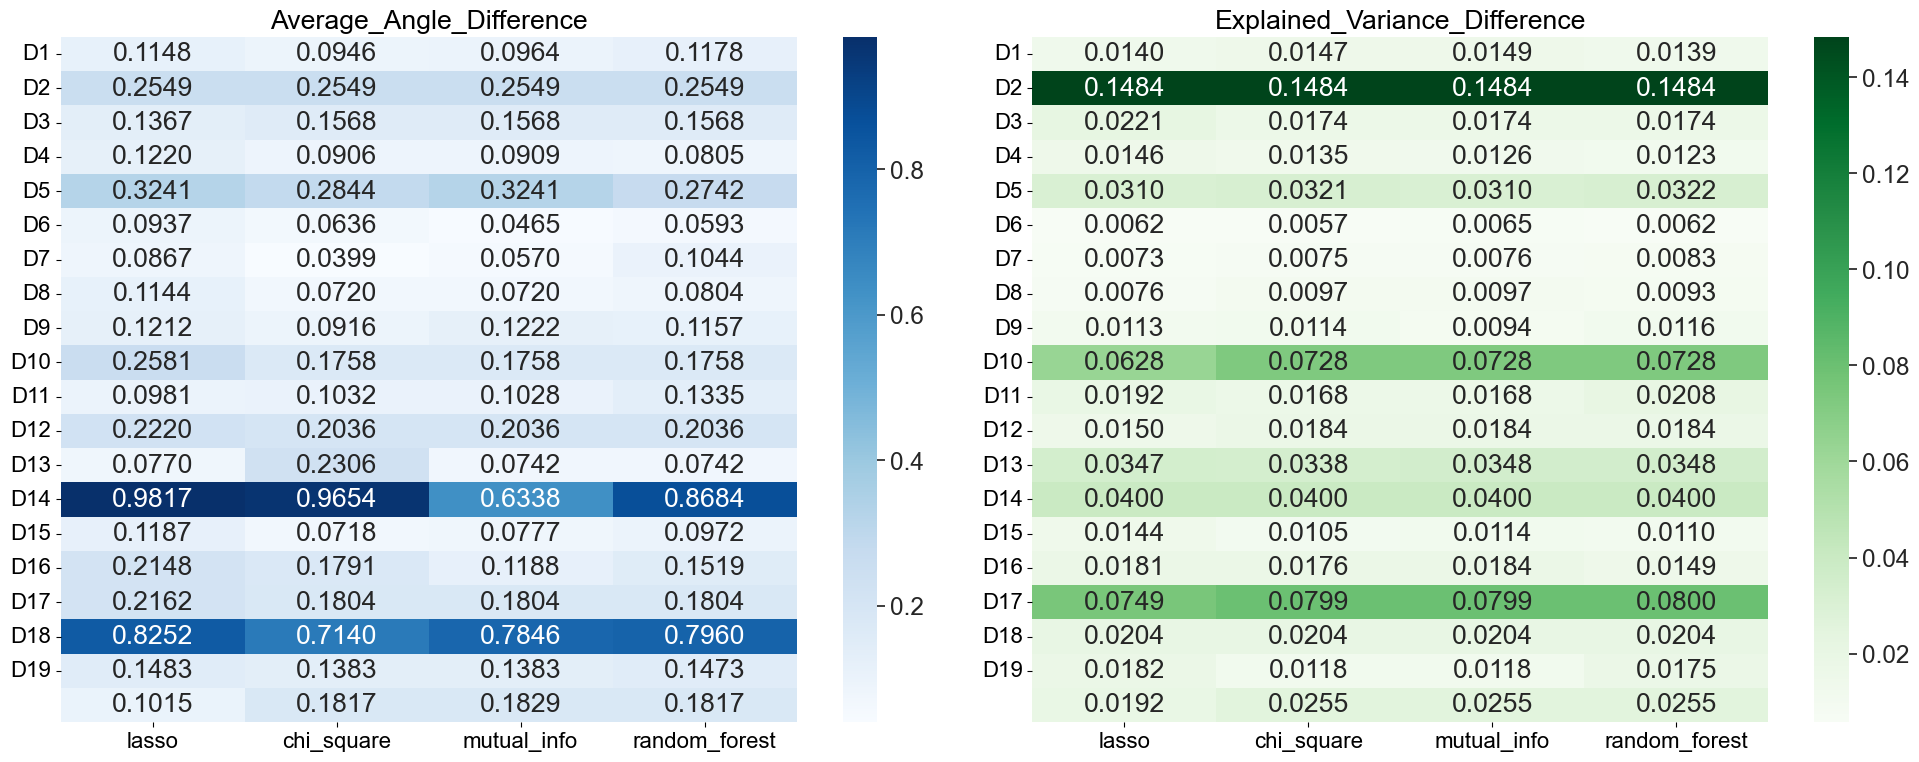

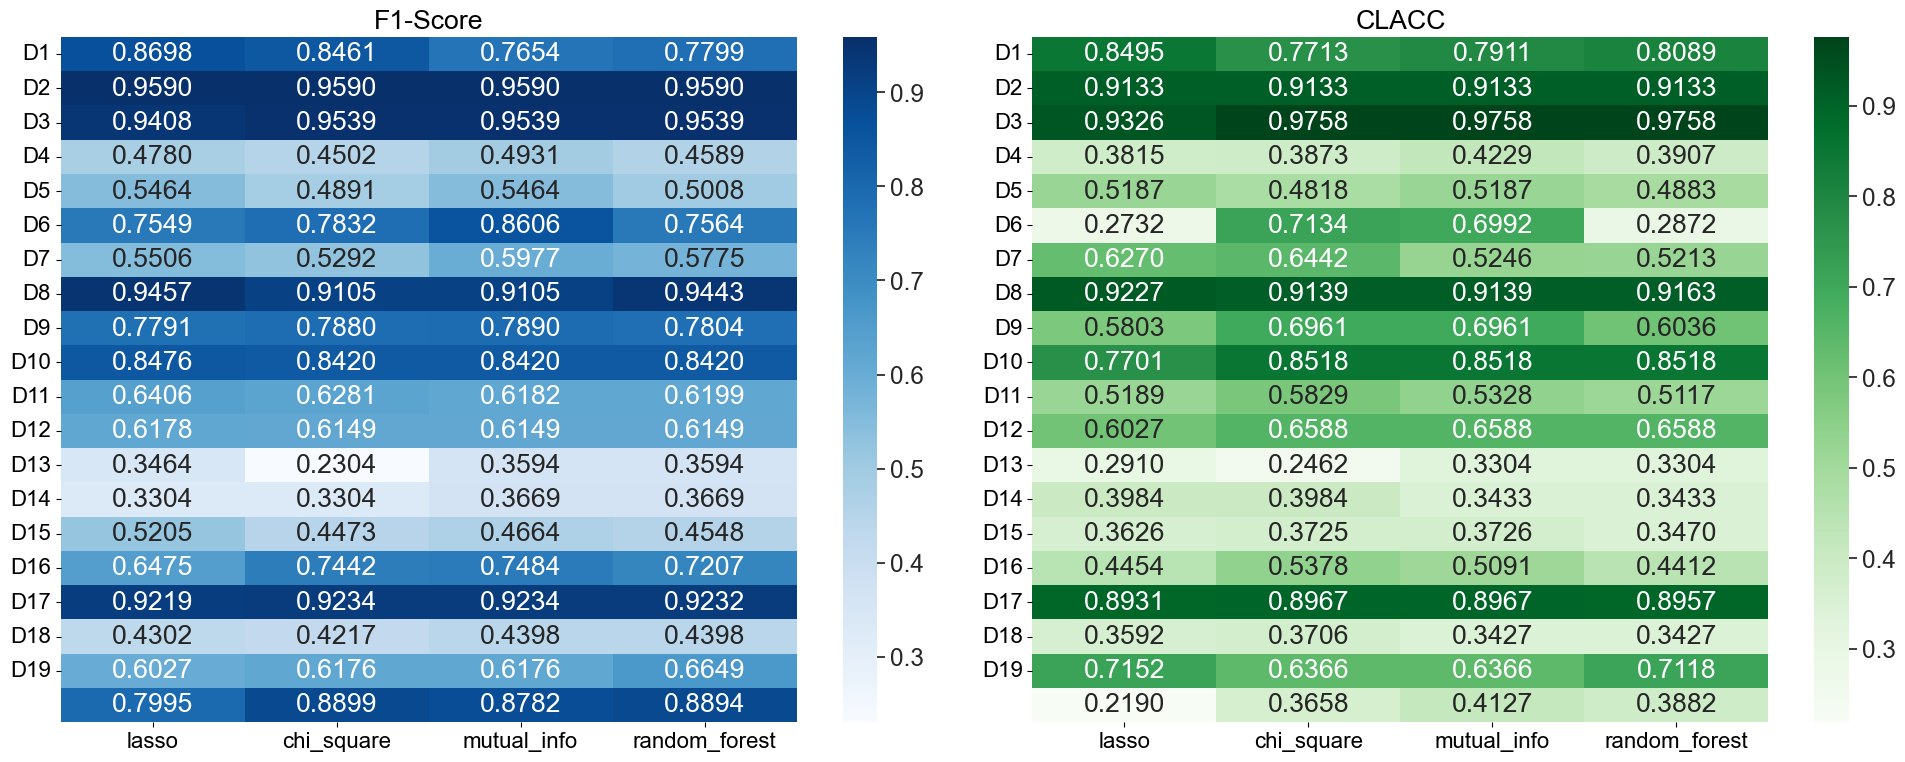

In [3]:
#Plotting values heatmaps (Figure 7 in the appendix)
values_heatmap(df1, df2, methods, "Average_Angle_Difference", "Explained_Variance_Difference")
values_heatmap(df3, df4, methods, "F1-Score", "CLACC")

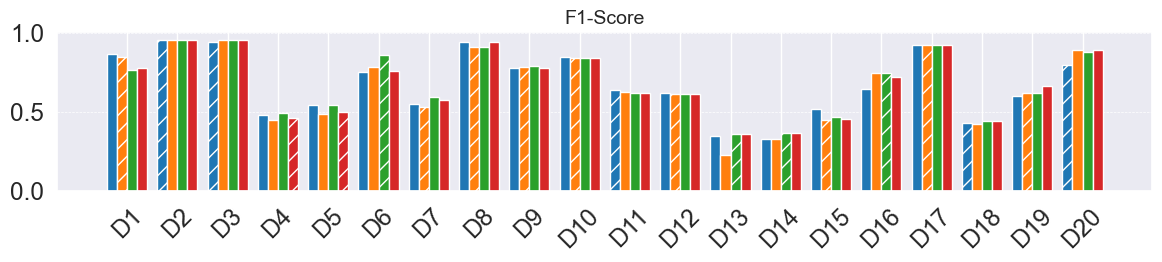

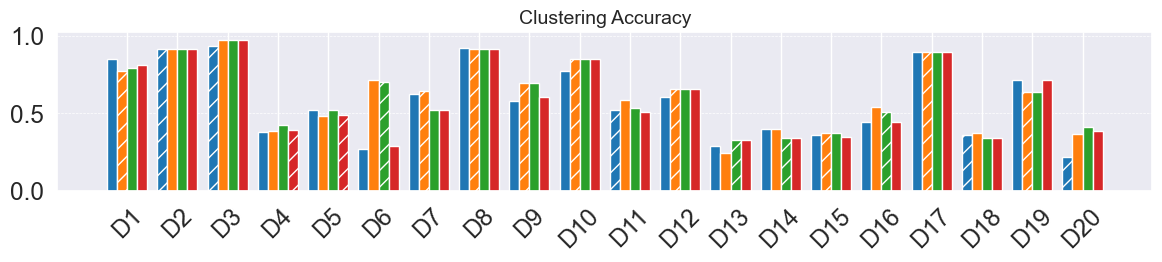

In [4]:
#Plotting bar charts (Figure 5)
bar_chart(df1, df3, 'F1-Score')
bar_chart(df1, df4, 'Clustering Accuracy')

In [5]:
#AAD calculation for features line graphs
datasets = ['zoo', 'iris', 'wine', 'automobile', 'glass', 'dermatology', 'cylinder', 'breast_cancer', 'credit', 'raisin', 'diabetic_retino',
            'phishing', 'yeast', 'car_eval', 'steel', 'CTG', 'rice', 'nursery', 'drybean', 'letter']
methods = ["mutual_info"]
all_values = []

for dataset in datasets:
    res = []
    X, y = dataset_loader(dataset)
    le = LabelEncoder()
    for z in range(len(X.columns)):
        X.iloc[:, z] = le.fit_transform(X.iloc[:, z])
    enc = OrdinalEncoder()
    enc.fit(y)
    y = pd.Series(enc.transform(y).ravel())
    
    for method in methods:
        for fn in range(len(X.columns)):
            selfeats = selector_tuned(X, y, method, fn + 1)
            aad = AAD(X, selfeats)
            res.append(aad)
    all_values.append(res)

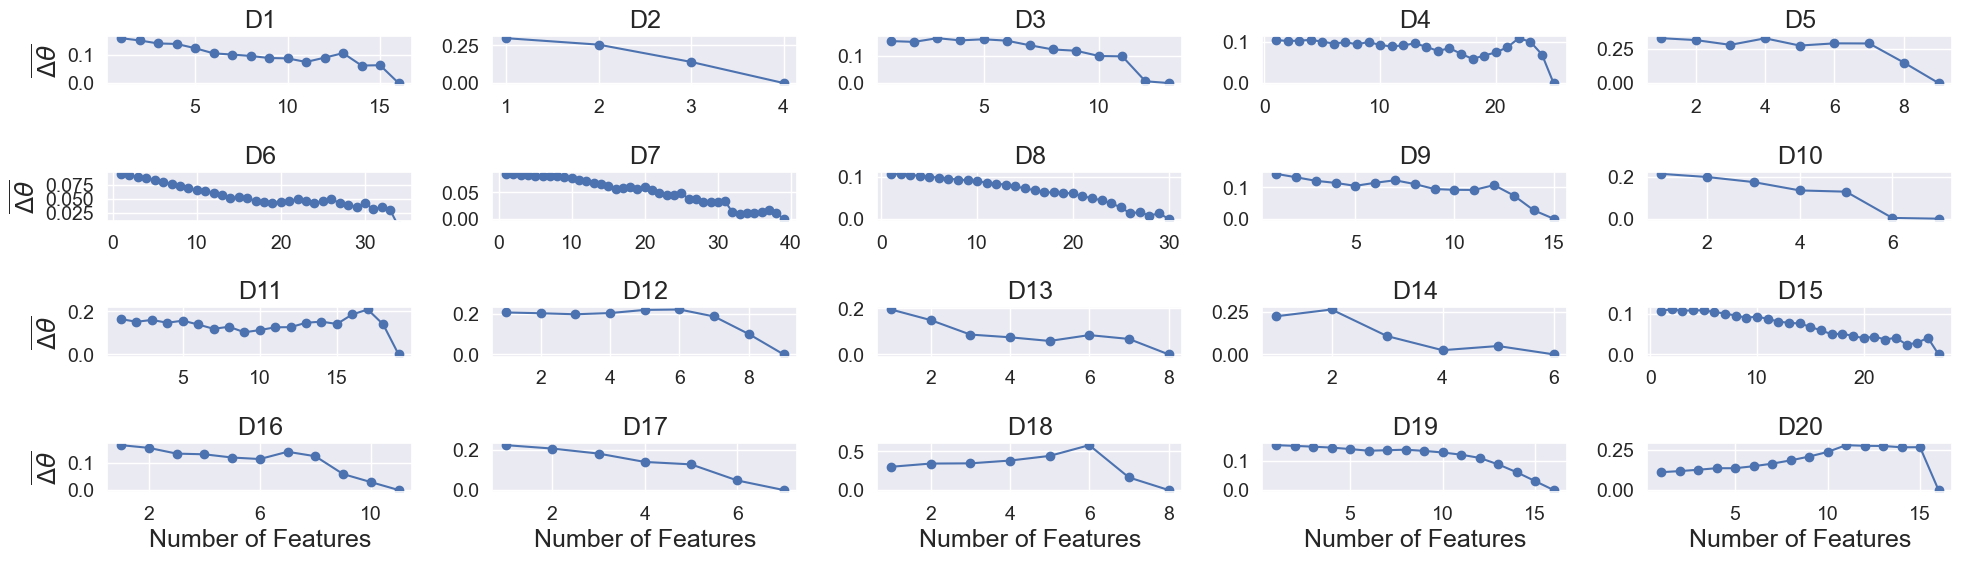

In [6]:
#Plotting features line graphs (Figure 6)
features_line_graph(all_values, datasets)